In [38]:
from scipy.io import wavfile
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
samplerate, audio= wavfile.read('sound2.wav')

In [40]:
samplerate

16000

In [41]:
audio.shape

(90320, 2)

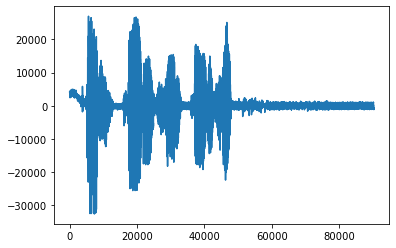

Original Signal:


In [42]:
n = np.arange(0,90320,1)
plt.plot(n,audio[:,0])
plt.show()
print('Original Signal:')
# ipd.display(ipd.Audio(data=audio[:,0], rate = 16000))

## Define function for low pass filter:

### h_lp[n] = (1/(n * pi)) *  sin(n*wc)
to obtain casuality, signal need to be shifted by m = N-1/2.

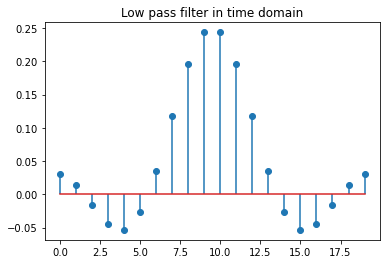

In [43]:
def lowpass_filter(n,wc,m):
    h_lowpass = []
    for value in n:
        if value!=(len(n)-1)/2:
            h_lowpass.append(np.sin((value-m)*wc)/((value-m)*np.pi))
        else:
            h_lowpass.append(0.25)
    return h_lowpass

n = np.arange(0,20,1)
m = (len(n)-1)/2
wc = np.pi/4
h_lowpass = lowpass_filter(n,wc,m)
# h_lowpass
plt.stem(n,h_lowpass,use_line_collection=True)
plt.title('Low pass filter in time domain');
 

## Define function for plotting frequency response of given filter:

### H_lp(jw) = summation(h_lp[n] * exp(-j*n*w))       n = 0,1,2,3,....m

In [44]:
def freq_response(h,n,w):
    freq_resp = []
    for freq in w:
        h_freq = 0
        for value in n:
            h_freq += h[value] * np.exp(-1j*value*freq)
        freq_resp.append(abs(h_freq))
    return freq_resp

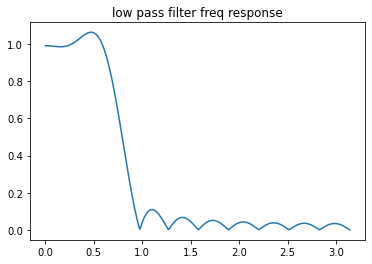

In [45]:
n = np.arange(0,20,1)
m = (len(n)-1)/2
wc = np.pi/4
h_lowpass = lowpass_filter(n,wc,m)
w = np.linspace(0,np.pi,num=400)
freq_resp = freq_response(h_lowpass,n,w)
plt.plot(w,freq_resp)
plt.title('low pass filter freq response');

## Define function for High pass filter:

### h_hp[n] = (-1)^n * h_lp[n]    n = 0,1,2,3,.......m

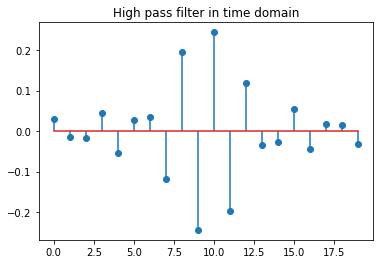

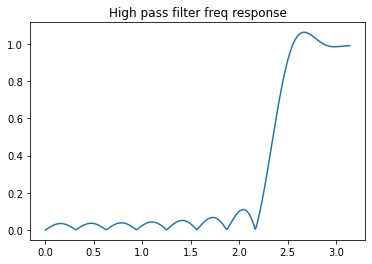

In [46]:
def highpass_filter(n,h_lowpass):
    h_highpass = np.zeros(len(h_lowpass))
    for value in n:
        h_highpass[value] = ((-1)**value)*h_lowpass[value]
    return h_highpass

n = np.arange(0,20,1)
m = (len(n)-1)/2
wc = np.pi/4
h_lowpass = lowpass_filter(n,wc,m)
h_highpass = highpass_filter(n,h_lowpass)
# h_highpass 
plt.stem(n,h_highpass,use_line_collection=True)
plt.title('High pass filter in time domain')
plt.show()
w = np.linspace(0,np.pi,num=400)
freq_resp1 = freq_response(h_highpass,n,w)
plt.plot(w,freq_resp1)
plt.title('High pass filter freq response');

## Define function for Band pass filter:

### h_bp[n] = (2*cos(n*w0)) * h_lp[n]    n = 0,1,2,3,.......m

### wu - wl = 2*wc,   w0 = (wu+wl)/2

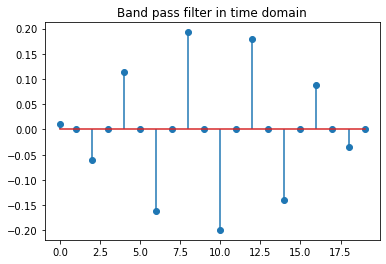

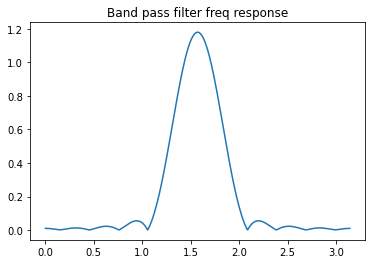

In [47]:
def bandpass_filter(n,wu,wl,h_lowpass):
    h_bandpass = np.zeros(len(h_lowpass))
    w0 = (wu + wl)/2
    h_bandpass = 2*np.cos(n*w0)*h_lowpass
    return h_bandpass

wl = 0.4*np.pi
wu = 0.6*np.pi 
wc = (wu-wl)/2
n = np.arange(0,20,1)
m = (len(n)-1)/2
h_lowpass = lowpass_filter(n,wc,m)
h_bandpass = bandpass_filter(n,wu,wl,h_lowpass)
# h_bandpass 
plt.stem(n,h_bandpass,use_line_collection=True)
plt.title('Band pass filter in time domain')
plt.show()
w = np.linspace(0,np.pi,num=400)
freq_resp2 = freq_response(h_bandpass,n,w)
plt.plot(w,freq_resp2)
plt.title('Band pass filter freq response');

## Define function for Band stop filter:

### h_bs[n] = 1 - h_bp[n]     n=0

### h_bs[n] = -1 * h_bp[n]    n = 0,1,2,3,.......m

### wu - wl = 2*wc,   w0 = (wu+wl)/2

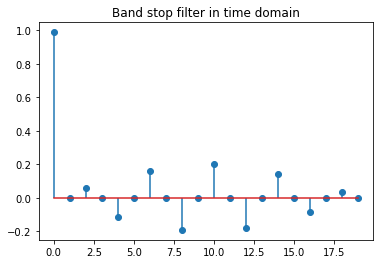

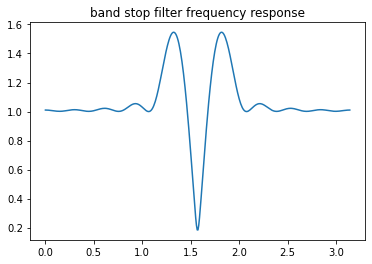

In [48]:
def bandstop_filter(h_bandpass,n):
    h_bandstop = np.zeros(len(h_bandpass))
    for value in n:
        if value!=0:
            h_bandstop[value] = -1*h_bandpass[value]
        else:
            h_bandstop[value] = 1 - h_bandpass[value]
    return h_bandstop

wl = 0.4*np.pi
wu = 0.6*np.pi 
wc = (wu-wl)/2
m = (len(n)-1)/2
n = np.arange(0,20,1)
h_lowpass = lowpass_filter(n,wc,m)
h_bandpass = bandpass_filter(n,wu,wl,h_lowpass)
h_bandstop = bandstop_filter(h_bandpass,n)
# h_bandstop 
plt.stem(n,h_bandstop,use_line_collection=True);
plt.title('Band stop filter in time domain');
plt.show()
w = np.linspace(0,np.pi,num=400)
freq_resp3 = freq_response(h_bandstop,n,w)
plt.plot(w,freq_resp3)
plt.title('band stop filter frequency response');